<a href="https://colab.research.google.com/github/CocoaTony/BBQ-Manager/blob/main/Model_WatalyGold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale ทั้งหมดให้อยู่ใน [0,1]
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

# โหลด dataset
train_ds = train_datagen.flow_from_directory(
    'Data_mang_last/Train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

val_ds = val_datagen.flow_from_directory(
    'Data_mang_last/Validation',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_ds = test_datagen.flow_from_directory(
    'Data_mang_last/Test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # important for evaluation
)


Found 542 images belonging to 2 classes.
Found 119 images belonging to 2 classes.
Found 233 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = MobileNetV2(input_shape=(128,128,3), include_top=False, weights='imagenet')
base_model.trainable = False  # freeze pre-trained layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ฝึกโมเดล
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 902ms/step - accuracy: 0.4822 - loss: 0.7628 - val_accuracy: 0.9580 - val_loss: 0.2528
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 756ms/step - accuracy: 0.9348 - loss: 0.2270 - val_accuracy: 0.9664 - val_loss: 0.1494
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 772ms/step - accuracy: 0.9725 - loss: 0.1394 - val_accuracy: 0.9748 - val_loss: 0.1102
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 761ms/step - accuracy: 0.9932 - loss: 0.0867 - val_accuracy: 0.9832 - val_loss: 0.0953
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 748ms/step - accuracy: 0.9847 - loss: 0.0913 - val_accuracy: 0.9832 - val_loss: 0.0854


In [ ]:
# Accuracy และ Loss
loss, acc = model.evaluate(test_ds)
print(f"Test Accuracy: {acc*100:.2f}%")

# ทำ prediction ทั้ง test set
import numpy as np

y_true = test_ds.classes
y_pred_prob = model.predict(test_ds)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 398ms/step - accuracy: 0.9986 - loss: 0.0284
Test Accuracy: 99.57%
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 575ms/step


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=list(test_ds.class_indices.keys())))


              precision    recall  f1-score   support

    Not_Ripe       0.99      1.00      1.00       140
        Ripe       1.00      0.99      0.99        93

    accuracy                           1.00       233
   macro avg       1.00      0.99      1.00       233
weighted avg       1.00      1.00      1.00       233



1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


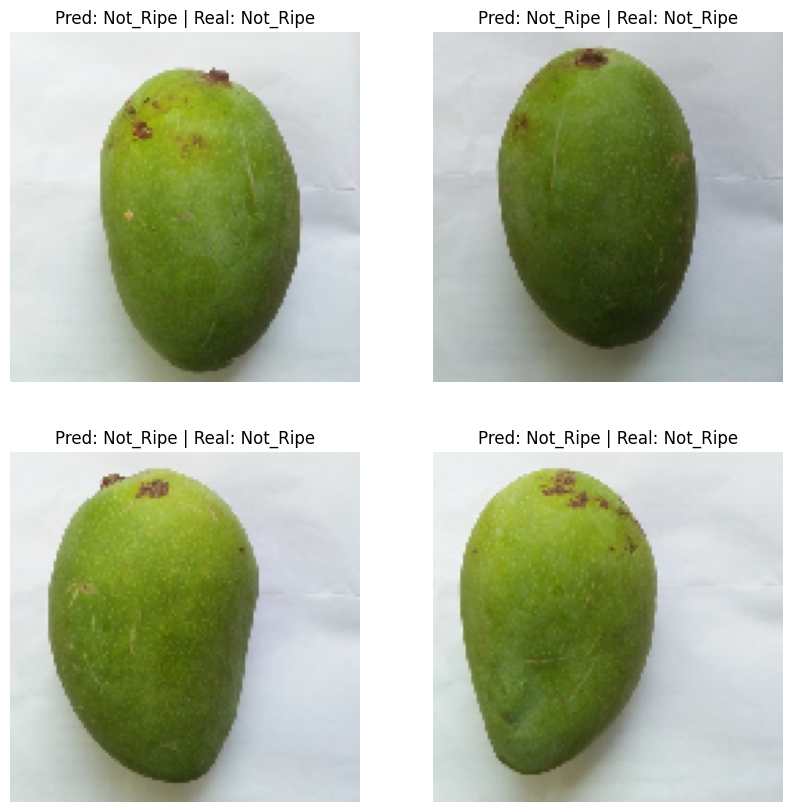

In [ ]:
import matplotlib.pyplot as plt

class_names = list(test_ds.class_indices.keys())
images, labels = next(test_ds)  # ดึง batch แรก
predictions = model.predict(images)
pred_labels = (predictions > 0.5).astype(int)

plt.figure(figsize=(10,10))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    plt.imshow(images[i])
    plt.title(f"Pred: {class_names[pred_labels[i][0]]} | Real: {class_names[int(labels[i])]}")
    plt.axis('off')
plt.show()


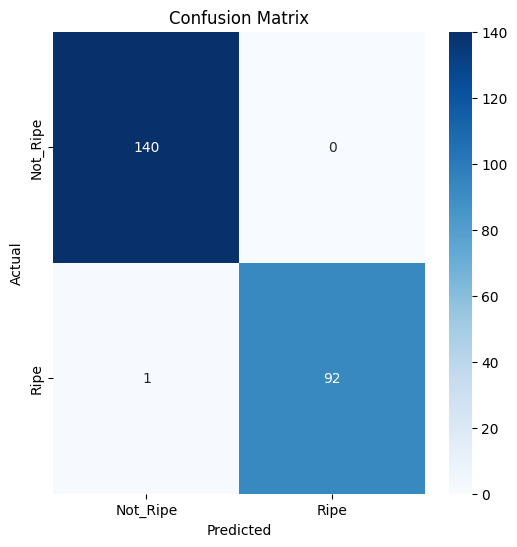

              precision    recall  f1-score   support

    Not_Ripe       0.99      1.00      1.00       140
        Ripe       1.00      0.99      0.99        93

    accuracy                           1.00       233
   macro avg       1.00      0.99      1.00       233
weighted avg       1.00      1.00      1.00       233



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ดึง class names
class_names = list(test_ds.class_indices.keys())

# คำนวณ confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# แสดง precision, recall, f1-score
print(classification_report(y_true, y_pred, target_names=class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
IMG20200713150150.jpg | Real: Not_Ripe | Pred: Not_Ripe | Prob: 0.014
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
IMG20200713145725.jpg | Real: Not_Ripe | Pred: Not_Ripe | Prob: 0.005
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
IMG20200713150459.jpg | Real: Not_Ripe | Pred: Not_Ripe | Prob: 0.007
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
IMG20200713150324.jpg | Real: Not_Ripe | Pred: Not_Ripe | Prob: 0.008
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
IMG20200713150231.jpg | Real: Not_Ripe | Pred: Not_Ripe | Prob: 0.025
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
IMG20200715111704.jpg | Real: Not_Ripe | Pred: Not_Ripe | Prob: 0.010
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
IMG20200713150330.jpg | Real: Not_Ripe | Pred: Not_Ripe | Prob: 0.005
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
IMG20200713150406.jpg | Real: Not_Ripe | Pred: Not_Ripe | Prob: 0.010
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
IMG20200713142151.jpg | Real: Not_Ripe | Pred: Not_Ripe | Prob: 0.015
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62

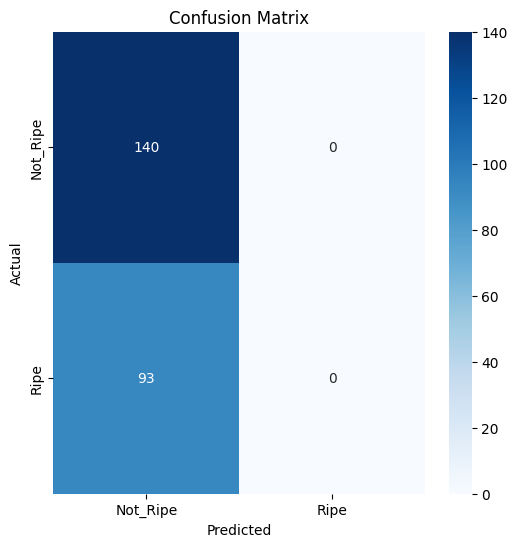

              precision    recall  f1-score   support

    Not_Ripe       0.60      1.00      0.75       140
        Ripe       0.00      0.00      0.00        93

    accuracy                           0.60       233
   macro avg       0.30      0.50      0.38       233
weighted avg       0.36      0.60      0.45       233



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# กำหนด path ของ Test folder
test_dir = "/content/Data_mang_last/Test"
class_names = ['Not_Ripe', 'Ripe']  # ชื่อคลาสตาม folder

# ฟังก์ชัน preprocess รูปภาพให้ตรงกับ input ของโมเดล
def preprocess_image(image_path, target_size=(128,128)):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(target_size)
    img_array = np.array(img).astype(np.float32) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # เพิ่ม batch dimension
    return img_array

y_true = []
y_pred = []

# วนลูปทุกคลาส
for label_index, class_name in enumerate(class_names):
    class_dir = os.path.join(test_dir, class_name)
    for img_name in os.listdir(class_dir):
        if img_name.endswith(('.png', '.jpg', '.jpeg')):  # ตรวจสอบไฟล์รูป
            img_path = os.path.join(class_dir, img_name)

            # preprocess รูป
            img_array = preprocess_image(img_path, target_size=(128,128))

            # prediction
            pred_prob = model.predict(img_array)
            pred_class = np.argmax(pred_prob, axis=1)[0]

            # เก็บผลลัพธ์
            y_true.append(label_index)
            y_pred.append(pred_class)

            # print ผลลัพธ์แต่ละรูป
            print(f"{img_name} | Real: {class_name} | Pred: {class_names[pred_class]} | Prob: {pred_prob[0][pred_class]:.3f}")

# แปลงเป็น numpy array
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# แสดง confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# แสดง precision, recall, f1-score
print(classification_report(y_true, y_pred, target_names=class_names))


In [ ]:
import tensorflow as tf

# สมมติว่า model ของคุณชื่อว่า 'model'
# หรือโหลดจากไฟล์ h5
# model = tf.keras.models.load_model("my_model.h5")

# สร้าง TFLite Converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# --- ตัวเลือกการบีบอัด (Optional) ---
# 1. ลดขนาดด้วย float16
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]

# 2. หรือทำ integer quantization (ต้องการ representative dataset)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# converter.representative_dataset = representative_dataset_gen
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# converter.inference_input_type = tf.uint8
# converter.inference_output_type = tf.uint8

# แปลงเป็น TFLite
tflite_model = converter.convert()

# บันทึกเป็นไฟล์ .tflite
with open("model_compressed.tflite", "wb") as f:
    f.write(tflite_model)

print("Saved TFLite model as model_compressed.tflite")


NameError: name 'model' is not defined

In [ ]:
#New Model
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Paths
train_dir = "/content/drive/MyDrive/Data_mang_last/Train"
val_dir = "/content/drive/MyDrive/Data_mang_last/Validation"
test_dir = "/content/drive/MyDrive/Data_mang_last/Test"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

# Load datasets
train_ds = image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = image_dataset_from_directory(
    val_dir,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_ds = image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 542 files belonging to 2 classes.
Found 119 files belonging to 2 classes.
Found 233 files belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Optimize data pipeline
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Compute class weights
all_train_labels = np.concatenate([y for x, y in train_ds])
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(all_train_labels),
    y=all_train_labels
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)


Class Weights: {0: np.float64(0.8338461538461538), 1: np.float64(1.2488479262672811)}


In [ ]:
# Build model
model = models.Sequential([
    layers.Rescaling(1./255),         # Normalize
    data_augmentation,                # Augmentation
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    class_weight=class_weights
)

NameError: name 'base_model' is not defined

In [ ]:
loss, acc = model.evaluate(test_ds)
print(f"Test Loss: {loss:.4f} | Test Accuracy: {acc:.4f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 307ms/step - accuracy: 0.9986 - loss: 0.0137
Test Loss: 0.0338 | Test Accuracy: 0.9957


tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(32,), dtype=int32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 978ms/step
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(32,), dtype=int32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(32,), dtype=int32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(32,), dtype=int32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(32,), dtype=int32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
tf.Tensor

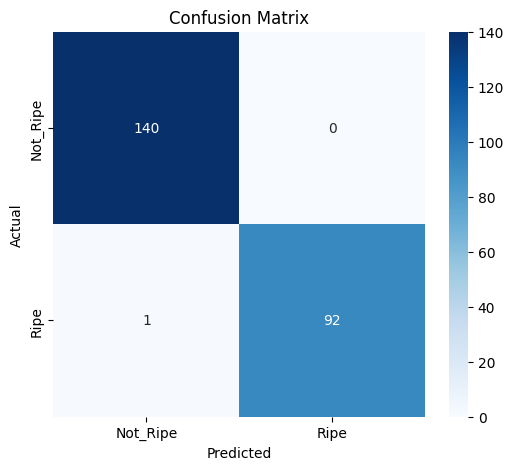

In [ ]:
# ดึงข้อมูลทั้งหมดจาก test_ds
y_true = []
y_pred = []

for images, labels in test_ds:
    print(labels)
    preds = model.predict(images)
    y_pred.extend((preds > 0.5).astype(int).flatten())
    y_true.extend(labels.numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
def preprocess_single_image(img_path, img_size=(128, 128)):
    # โหลดรูปและ resize ให้ตรงกับตอนเทรน
    img = tf.keras.utils.load_img(img_path, target_size=img_size)
    img = tf.keras.utils.img_to_array(img)

    # แปลงเป็น float และ normalize เหมือนใน pipeline
    img = tf.cast(img, tf.float32) / 255.0

    # เพิ่มมิติ batch (1, 128, 128, 3)
    img = tf.expand_dims(img, axis=0)
    return img
# Path รูปที่ต้องการทำนาย
img_path = "/content/drive/MyDrive/Data_mang_last/Test/Not_Ripe/IMG20200713141737.jpg"

# Preprocess รูปเดี่ยว
img_array = preprocess_single_image(img_path, IMG_SIZE)

# Predict
pred = model.predict(img_array)

# แสดงผล
if pred[0][0] > 0.5:
    print(f"Predicted: {class_names[1]} (prob={pred[0][0]:.4f})")
else:
    print(f"Predicted: {class_names[0]} (prob={1 - pred[0][0]:.4f})")




NameError: name 'IMG_SIZE' is not defined

In [ ]:
import tensorflow as tf

# สมมติว่า model ของคุณชื่อว่า 'model'
# หรือโหลดจากไฟล์ h5
# model = tf.keras.models.load_model("my_model.h5")

# สร้าง TFLite Converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]

# แปลงเป็น TFLite
tflite_model = converter.convert()

# บันทึกเป็นไฟล์ .tflite
with open("model_compressed.tflite", "wb") as f:
    f.write(tflite_model)

print("Saved TFLite model as model_compressed.tflite")

Saved artifact at '/tmp/tmpeg1uy2nu'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor_638')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132214656530192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132214656530960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132214656529424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132214656530384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132214656531536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132214656530768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132214656531152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132214656526928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132214656532304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132214656531728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1322146565